In [2]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

Loading data: Since I have several csv files I have to load them into pandas dfs and then concatenate them.

In [3]:
# List of file names
filenames = ["hiv1.csv", "hiv2.csv", "hiv3.csv", "hiv4.csv", "hiv5.csv"]

# Create an empty list to store DataFrames
dfs = []

# Iteratively read each CSV into a DataFrame
for f in filenames:
    data = pd.read_csv(f)
    dfs.append(data)
    
# Concatenate each DataFrame into a single hiv_data df
hiv_data = pd.concat(dfs, ignore_index=True)

In [4]:
# Load top of the HIV data as well as info
hiv_data.head()

,gender,age,occupation,partner_count,condom_use_last_month,location,marital_status,educational_level,awareness_of_hiv,sex_last_month,drug_use,std_last_year,commercial_sex_last_year,hiv_test_last_year,hiv_test_result
0,M,3(29-40),unemployed,1,no,Bukhara region,married,college or above,yes,no,no,no,no,yes,0
1,M,4(41-48),other,1,no,Tashkent city,married,college or above,no,no,no,no,no,yes,0
2,F,2(18-28),healthcare worker,1,yes,Ferghana region,cohabitation,middle school,yes,yes,no,no,no,yes,0
3,F,2(18-28),other,2,no,Tashkent region,married,high school or lyceum,yes,no,no,no,no,no,0
4,M,2(18-28),healthcare worker,1,no,Tashkent city,married,high school or lyceum,yes,no,no,no,no,no,0


In [5]:
hiv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5019 entries, 0 to 5018
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    5019 non-null   object
 1   age                       5019 non-null   object
 2   occupation                5019 non-null   object
 3   partner_count             5019 non-null   int64 
 4   condom_use_last_month     5019 non-null   object
 5   location                  5019 non-null   object
 6   marital_status            5019 non-null   object
 7   educational_level         5018 non-null   object
 8   awareness_of_hiv          5019 non-null   object
 9   sex_last_month            5019 non-null   object
 10  drug_use                  5019 non-null   object
 11  std_last_year             5019 non-null   object
 12  commercial_sex_last_year  5019 non-null   object
 13  hiv_test_last_year        5019 non-null   object
 14  hiv_test_result         

In [6]:
# Get all columns with categorical data
cat_columns = hiv_data.select_dtypes(include=['object']).columns

# Loop through each categorical column and print value counts
for column in cat_columns:
    print(f"Value counts for {column}:")
    print(hiv_data[column].value_counts())
    print("\n")

Value counts for gender:
gender
F    2519
M    2500
Name: count, dtype: int64


Value counts for age:
age
2(18-28)     2538
3(29-40)     2052
4(41-48)      336
5(449-55)      62
1(15-17)       16
6(56-65)       11
7(>66)          4
Name: count, dtype: int64


Value counts for occupation:
occupation
other                2983
healthcare worker    1154
unemployed            599
sex worker            283
Name: count, dtype: int64


Value counts for condom_use_last_month:
condom_use_last_month
no     4371
yes     648
Name: count, dtype: int64


Value counts for location:
location
Tashkent city                 753
Tashkent region               656
Syrdarya region               577
Andijan region                503
Khorezm region                443
Samarkand region              335
Ferghana region               334
Surkhandarya region           275
Jizzakh region                242
Namangan region               232
Bukhara region                201
Kashkadarya region            173
Navoi regi

Based on the above output, we can convert gender into binary variable (M to 1, F to 0).

In [7]:
hiv_data['gender'].replace(to_replace=['M','F'], value=[1,0],inplace=True)
hiv_data.head()

,gender,age,occupation,partner_count,condom_use_last_month,location,marital_status,educational_level,awareness_of_hiv,sex_last_month,drug_use,std_last_year,commercial_sex_last_year,hiv_test_last_year,hiv_test_result
0,1,3(29-40),unemployed,1,no,Bukhara region,married,college or above,yes,no,no,no,no,yes,0
1,1,4(41-48),other,1,no,Tashkent city,married,college or above,no,no,no,no,no,yes,0
2,0,2(18-28),healthcare worker,1,yes,Ferghana region,cohabitation,middle school,yes,yes,no,no,no,yes,0
3,0,2(18-28),other,2,no,Tashkent region,married,high school or lyceum,yes,no,no,no,no,no,0
4,1,2(18-28),healthcare worker,1,no,Tashkent city,married,high school or lyceum,yes,no,no,no,no,no,0


We can do the same for awareness_of_hiv, condom_use_last_month, sex_last_month, drug_use, std_last_year, commercial_sex_last_year and hiv_test_last_year, where we replace 'yes' with 1, 'no' with 0.

In [8]:
to_binary = ['awareness_of_hiv', 'condom_use_last_month', 'sex_last_month', 'drug_use', 'std_last_year', 'commercial_sex_last_year', 'hiv_test_last_year']
for col in to_binary:
    hiv_data[col].replace(to_replace=['yes','no'], value=[1,0], inplace=True)

hiv_data.head()

,gender,age,occupation,partner_count,condom_use_last_month,location,marital_status,educational_level,awareness_of_hiv,sex_last_month,drug_use,std_last_year,commercial_sex_last_year,hiv_test_last_year,hiv_test_result
0,1,3(29-40),unemployed,1,0,Bukhara region,married,college or above,1,0,0,0,0,1,0
1,1,4(41-48),other,1,0,Tashkent city,married,college or above,0,0,0,0,0,1,0
2,0,2(18-28),healthcare worker,1,1,Ferghana region,cohabitation,middle school,1,1,0,0,0,1,0
3,0,2(18-28),other,2,0,Tashkent region,married,high school or lyceum,1,0,0,0,0,0,0
4,1,2(18-28),healthcare worker,1,0,Tashkent city,married,high school or lyceum,1,0,0,0,0,0,0


Now, we are going to One-Hot encode the remaining nominal categorical variables, i.e., age, occupation, location, marital_status, educational_level.

In [9]:
hiv_data_enc = pd.get_dummies(hiv_data, columns=['age', 'occupation', 'location', 'marital_status', 'educational_level'])
hiv_data_enc.head()

,gender,partner_count,condom_use_last_month,awareness_of_hiv,sex_last_month,drug_use,std_last_year,commercial_sex_last_year,hiv_test_last_year,hiv_test_result,...,location_Tashkent region,marital_status_cohabitation,marital_status_divorced or widowed,marital_status_married,marital_status_unmarried,educational_level_Illiterate,educational_level_college or above,educational_level_high school or lyceum,educational_level_middle school,educational_level_primary school
0,1,1,0,1,0,0,0,0,1,0,...,False,False,False,True,False,False,True,False,False,False
1,1,1,0,0,0,0,0,0,1,0,...,False,False,False,True,False,False,True,False,False,False
2,0,1,1,1,1,0,0,0,1,0,...,False,True,False,False,False,False,False,False,True,False
3,0,2,0,1,0,0,0,0,0,0,...,True,False,False,True,False,False,False,True,False,False
4,1,1,0,1,0,0,0,0,0,0,...,False,False,False,True,False,False,False,True,False,False


## Splitting into training and testing sets

In [10]:
# Separate features (X) and target variable (y)
X = hiv_data_enc.drop('hiv_test_result', axis=1)
y = hiv_data_enc['hiv_test_result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [11]:
print("Value counts before resampling:\n", y_train.value_counts())
print("Value counts after resampling:\n", y_train_resampled.value_counts())

Value counts before resampling:
 hiv_test_result
0    3915
1     100
Name: count, dtype: int64
Value counts after resampling:
 hiv_test_result
0    3915
1    3915
Name: count, dtype: int64


We have only one column partner_count that we want to scale using MinMax scaling method

In [12]:
X_train_resampled['partner_count'] = (X_train_resampled['partner_count'] - 1)/4
X_train_resampled.head()

,gender,partner_count,condom_use_last_month,awareness_of_hiv,sex_last_month,drug_use,std_last_year,commercial_sex_last_year,hiv_test_last_year,age_1(15-17),...,location_Tashkent region,marital_status_cohabitation,marital_status_divorced or widowed,marital_status_married,marital_status_unmarried,educational_level_Illiterate,educational_level_college or above,educational_level_high school or lyceum,educational_level_middle school,educational_level_primary school
0,0,0.0,0,1,1,0,0,0,1,False,...,False,False,False,True,False,False,False,True,False,False
1,0,0.0,0,1,1,0,0,1,0,False,...,True,False,False,True,False,False,True,False,False,False
2,0,0.0,0,1,0,0,0,0,0,False,...,False,False,False,False,True,False,False,True,False,False
3,0,0.0,1,1,1,0,0,0,1,False,...,False,False,False,True,False,False,True,False,False,False
4,1,0.0,1,1,0,0,0,0,1,False,...,False,False,False,True,False,False,True,False,False,False


## Logistic regression

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
log_clf =LogisticRegression()

In [75]:
log_clf.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [77]:
# We now have a working Logistic Regression model. Let’s try it out on a few instances from the training set:

some_data = X_train.iloc[:10]
some_targets = y_train.iloc[:10]
print("Predictions:", log_clf.predict(some_data))
print("Test results:", list(some_targets))

Predictions: [0 0 0 0 0 0 0 0 0 0]


In [98]:
# Now we want to measure this model’s key metrics on the whole testing set using Scikit-Learn’s metrics functions:
hiv_results_predictions = log_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, hiv_results_predictions))
print("Classification Report:\n", classification_report(y_test, hiv_results_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, hiv_results_predictions))

Accuracy: 0.951195219123506
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       979
           1       0.00      0.00      0.00        25

    accuracy                           0.95      1004
   macro avg       0.49      0.49      0.49      1004
weighted avg       0.95      0.95      0.95      1004

Confusion Matrix:
 [[955  24]
 [ 25   0]]


In [85]:
# Now we want to measure this model’s key metrics on the whole training set using Scikit-Learn’s metrics functions:
hiv_results_predictions = log_clf.predict(X_train_resampled)
print("Accuracy:", accuracy_score(y_train_resampled, hiv_results_predictions))
print("Classification Report:\n", classification_report(y_train_resampled, hiv_results_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_train_resampled, hiv_results_predictions))

Accuracy: 0.9527458492975734
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      3915
           1       0.97      0.94      0.95      3915

    accuracy                           0.95      7830
   macro avg       0.95      0.95      0.95      7830
weighted avg       0.95      0.95      0.95      7830

Confusion Matrix:
 [[3792  123]
 [ 247 3668]]


The Logistic Regression based model does poorly as even though it had high accuracy it did not predict any of the positive hiv test cases to atually have hiv, and instead assigned 0 to every single test.

## Decision tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [15]:
# We now have a working Decison Tree model. Let’s try it out on a few instances from the training set:

some_data = X_train.iloc[:10]
some_targets = y_train.iloc[:10]
print("Predictions:", tree_clf.predict(some_data))
print("Test results:", list(some_targets))

Predictions: [0 0 0 0 0 0 0 0 0 0]
Test results: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [40]:
categories = ['age_1(15-17)',
       'age_2(18-28)', 'age_3(29-40)', 'age_4(41-48)', 'age_5(49-55)',
       'age_6(56-65)', 'age_7(>66)', 'occupation_healthcare worker',
       'occupation_other', 'occupation_sex worker', 'occupation_unemployed',
       'location_Andijan region', 'location_Bukhara region',
       'location_Ferghana region', 'location_Jizzakh region',
       'location_Kashkadarya region', 'location_Khorezm region',
       'location_Namangan region', 'location_Navoi region',
       'location_Republic of Karakalpakstan', 'location_Samarkand region',
       'location_Surkhandarya region', 'location_Syrdarya region',
       'location_Tashkent city', 'location_Tashkent region',
       'marital_status_cohabitation', 'marital_status_divorced or widowed',
       'marital_status_married', 'marital_status_unmarried',
       'educational_level_Illiterate', 'educational_level_college or above',
       'educational_level_high school or lyceum',
       'educational_level_middle school', 'educational_level_primary school']

cat_status = {cat: False for cat in categories}

In [37]:
single_data = X_train.iloc[:1]
print(single_data.columns)

Index(['gender', 'partner_count', 'condom_use_last_month', 'awareness_of_hiv',
       'sex_last_month', 'drug_use', 'std_last_year',
       'commercial_sex_last_year', 'hiv_test_last_year', 'age_1(15-17)',
       'age_2(18-28)', 'age_3(29-40)', 'age_4(41-48)', 'age_5(449-55)',
       'age_6(56-65)', 'age_7(>66)', 'occupation_healthcare worker',
       'occupation_other', 'occupation_sex worker', 'occupation_unemployed',
       'location_Andijan region', 'location_Bukhara region',
       'location_Ferghana region', 'location_Jizzakh region',
       'location_Kashkadarya region', 'location_Khorezm region',
       'location_Namangan region', 'location_Navoi region',
       'location_Republic of Karakalpakstan', 'location_Samarkand region',
       'location_Surkhandarya region', 'location_Syrdarya region',
       'location_Tashkent city', 'location_Tashkent region',
       'marital_status_cohabitation', 'marital_status_divorced or widowed',
       'marital_status_married', 'marital_status_

In [43]:
import pandas as pd

# Your existing dictionary
column_names = ['column1', 'column2', 'column3', 'column4']
column_status = {column: False for column in column_names}

# Update specific keys to True
columns_to_update = ['column2', 'column4']
for column in columns_to_update:
    column_status[column] = True

# Add new key-value pairs
new_columns = {'column5': True, 'column6': False}

# Update the dictionary with new key-value pairs
column_status.update(new_columns)

# Create a DataFrame with a single row
df = pd.DataFrame([column_status])

# Print the resulting DataFrame
print(df)


   column1  column2  column3  column4  column5  column6
0    False     True    False     True     True    False


Now, we have to prepare testing features. All the categorical nominal data has already been one-hot encoded. Thus, we proceed to MinMax scaling partner_count variable.

<Axes: >

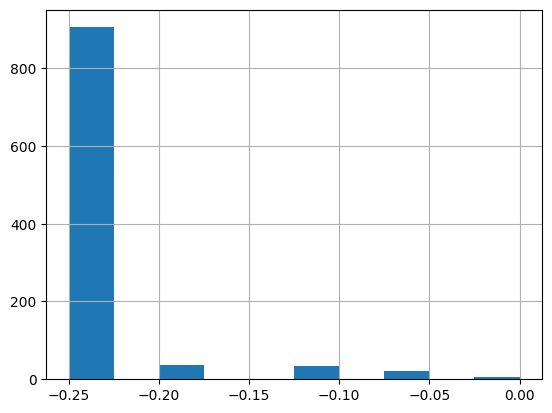

In [21]:
X_test['partner_count'] = (X_test['partner_count'] - 1)/4
X_test['partner_count'].hist()

In [22]:
# Now we want to measure this model’s key metrics on the whole training set using Scikit-Learn’s metrics functions:

hiv_results_predictions_tree = tree_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, hiv_results_predictions_tree))
print("Classification Report:\n", classification_report(y_test, hiv_results_predictions_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, hiv_results_predictions_tree))

Accuracy: 0.9332669322709163
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       979
           1       0.02      0.04      0.03        25

    accuracy                           0.93      1004
   macro avg       0.50      0.50      0.50      1004
weighted avg       0.95      0.93      0.94      1004

Confusion Matrix:
 [[936  43]
 [ 24   1]]


### Fune-tuning hyperparameters of Decision Tree Classifier for the Highest Recall

In [23]:
# Use RandomizedSearchCV for Hyper-Parameter Tuning for DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

#Criterion
criterion = ["gini", "entropy"]

#Splitter
splitter = ["best", "random"]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 60,15)]

# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 7, 9]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

# Create the random grid
random_grid = {'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

In [24]:
DT=DecisionTreeClassifier(random_state=100)

DT_randomcv=RandomizedSearchCV(estimator=DT,param_distributions=random_grid,scoring = 'recall', n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
DT_randomcv.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\user\Documents\Y4Sem2\projects\HIV_by_uzb_region\.venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
102 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
52 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\Documents\Y4Sem2\projects\HIV_by_uzb_region\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\Documents\Y4Sem2\projects\HIV_by_uzb_region\.venv\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\user\Documents\Y4Sem2\projects\HIV_by_uzb_region\.

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=100),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 5, 9, 13, 17, 22, 26,
                                                      30, 34, 38, 43, 47, 51,
                                                      55, 60],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 4, 5, 7, 9],
                                        'splitter': ['best', 'random']},
                   random_state=100, scoring='recall', verbose=2)

In [25]:
# Get the best parameters from the grid search
best_params = DT_randomcv.best_params_
print("Best Hyperparameters:", best_params)

# best decision tree classifier
dt_clf = DT_randomcv.best_estimator_

Best Hyperparameters: {'splitter': 'random', 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 26, 'criterion': 'entropy'}


In [26]:
# Now we want to measure this model’s key metrics on the whole testing set using Scikit-Learn’s metrics functions:
hiv_results_predictions_dt = dt_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, hiv_results_predictions_dt))
print("Classification Report:\n", classification_report(y_test, hiv_results_predictions_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, hiv_results_predictions_dt))

Accuracy: 0.9292828685258964
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       979
           1       0.06      0.12      0.08        25

    accuracy                           0.93      1004
   macro avg       0.52      0.53      0.52      1004
weighted avg       0.95      0.93      0.94      1004

Confusion Matrix:
 [[930  49]
 [ 22   3]]


In [27]:
# Now we want to measure this model’s key metrics on the whole training set using Scikit-Learn’s metrics functions:
hiv_results_predictions = dt_clf.predict(X_train_resampled)
print("Accuracy:", accuracy_score(y_train_resampled, hiv_results_predictions))
print("Classification Report:\n", classification_report(y_train_resampled, hiv_results_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_train_resampled, hiv_results_predictions))

Accuracy: 0.9767560664112388
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      3915
           1       0.97      0.98      0.98      3915

    accuracy                           0.98      7830
   macro avg       0.98      0.98      0.98      7830
weighted avg       0.98      0.98      0.98      7830

Confusion Matrix:
 [[3795  120]
 [  62 3853]]


Now, I will test-dump this model into the .pkl file for Flask deployment

In [29]:
import pickle

In [30]:
with open('model.pkl', 'wb') as files:
    pickle.dump(dt_clf, files)

### Using cross-validation

In [129]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_train_resampled, y_train_resampled,
scoring="recall", cv=10)

In [130]:
def display_scores(scores):

  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())


display_scores(scores)

Scores: [0.98721228 0.96163683 0.99744246 0.97186701 0.97186701 0.99744898
 0.99234694 0.94897959 0.99744898 1.        ]
Mean: 0.9826250065243489
Standard deviation: 0.0169720156980043


While recall definitely increased compared to previous models' predictions, the precision of the above model is very low: only 3% of all HIV positive predictions actually had a positive HIV test. Overall, the model still needs further improvement as we want to increase recall even more, while also improving precision. Even after we have done funetuning of hyperparameters, note that the the precision and recall on the training set is much higher than precision and recall on the testing set. That means the model is badly overfitting the training data. 

Possible solutions for overfitting are to simplify the model, constrain it (i.e., regularize it), or get a lot more training data. However, let's try another model called RandomForestClassifier model, which is based on the Decision Tree model.

## Random Forest Classifier

In [132]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Now we want to measure this model’s key metrics on the whole training set using Scikit-Learn’s metrics functions:
hiv_results_predictions_rf = rf_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, hiv_results_predictions_rf))
print("Classification Report:\n", classification_report(y_test, hiv_results_predictions_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, hiv_results_predictions_rf))

Accuracy: 0.9492031872509961
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       979
           1       0.04      0.04      0.04        25

    accuracy                           0.95      1004
   macro avg       0.51      0.51      0.51      1004
weighted avg       0.95      0.95      0.95      1004

Confusion Matrix:
 [[952  27]
 [ 24   1]]


In [133]:
# Now we want to measure this model’s key metrics on the whole training set using Scikit-Learn’s metrics functions:
hiv_results_predictions = rf_clf.predict(X_train_resampled)
print("Accuracy:", accuracy_score(y_train_resampled, hiv_results_predictions))
print("Classification Report:\n", classification_report(y_train_resampled, hiv_results_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_train_resampled, hiv_results_predictions))

Accuracy: 0.984802043422733
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3915
           1       0.98      0.99      0.98      3915

    accuracy                           0.98      7830
   macro avg       0.98      0.98      0.98      7830
weighted avg       0.98      0.98      0.98      7830

Confusion Matrix:
 [[3820   95]
 [  24 3891]]


In [137]:
#Criterion
criterion = ["gini", "entropy"]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [5, 10, 15, 20]

# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 7, 9]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

In [131]:
[int(x) for x in np.linspace(10, 1000,10)]

[10, 120, 230, 340, 450, 560, 670, 780, 890, 1000]

In [138]:
rf_clf = RandomForestClassifier(random_state=42)
rf_randomcv=RandomizedSearchCV(estimator=rf_clf, param_distributions=random_grid,scoring='recall',n_iter=100,cv=3,verbose=2,
                               random_state=42,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 4, 5, 7,
                                                              9]},
                   random_state=42, scoring='recall', verbose=2)

In [139]:
# Get the best model from the random search
best_model_rf_random = rf_randomcv.best_estimator_

# Make predictions on the test set
y_pred = best_model_rf_random.predict(X_test)

# Now we want to measure this model’s key metrics on the whole training set using Scikit-Learn’s metrics functions:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.898406374501992
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       979
           1       0.04      0.12      0.06        25

    accuracy                           0.90      1004
   macro avg       0.51      0.52      0.50      1004
weighted avg       0.95      0.90      0.92      1004

Confusion Matrix:
 [[899  80]
 [ 22   3]]


In [127]:
# Now we want to measure this model’s key metrics on the whole training set using Scikit-Learn’s metrics functions:
hiv_results_predictions = best_model_rf_random.predict(X_train_resampled)
print("Accuracy:", accuracy_score(y_train_resampled, hiv_results_predictions))
print("Classification Report:\n", classification_report(y_train_resampled, hiv_results_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_train_resampled, hiv_results_predictions))

Accuracy: 0.9818646232439336
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3915
           1       0.98      0.99      0.98      3915

    accuracy                           0.98      7830
   macro avg       0.98      0.98      0.98      7830
weighted avg       0.98      0.98      0.98      7830

Confusion Matrix:
 [[3824   91]
 [  51 3864]]
